In [1]:
%matplotlib inline
import qiskit

# Put in your API Token and Register

In [2]:
from qiskit import IBMQ
# Authenticate an account and add for use during this session. Replace string argument with your private token.

#IBMQ.delete_accounts()


print(qiskit.__version__)
print(qiskit.__qiskit_version__)
IBMQ.enable_account('407e9bae3b7dcde32639a7dcedf05ae6d7a0bed5c1a328e149afd88e5a6584d3776bfa94fdbcad4de27402abf2ed41b183ba3e6877fd64b80917cc06c4e820ae','https://api.quantum-computing.ibm.com/api/Hubs/ibm-q/Groups/open/Projects/main')# To store your credentials locally you can run:
IBMQ.stored_accounts()

#IBMQ.save_account('MY_API_TOKEN', 'MY_URL')




0.8.2
{'qiskit': '0.10.5', 'qiskit-terra': '0.8.2', 'qiskit-ignis': '0.1.1', 'qiskit-aer': '0.2.1', 'qiskit-ibmq-provider': '0.2.2', 'qiskit-aqua': '0.5.2'}


[]

# List the available backends and pick one

In [3]:
print(IBMQ.backends()) # remote IBM backends
from qiskit import Aer
print(Aer.backends()) # local backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>, <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>, <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]
[<QasmSimulator('qasm_simulator') from AerProvider()>, <StatevectorSimulator('statevector_simulator') from AerProvider()>, <UnitarySimulator('unitary_simulator') from AerProvider()>]


In [4]:
# Pick an available backend
backend = IBMQ.get_backend('ibmqx2') # if this isn't available pick a backend whose name containes '_qasm_simulator' from the output above

# Run your first quantum program
This program starts with an input of the quantum equivalent of five "0" bits, five quantum "0" bits. It then performs no action before it outputs the classical equivalent of the quantum bits. Since they haven't changed, the output should be 00000.

In [5]:
import time
q = qiskit.QuantumRegister(2)
c = qiskit.ClassicalRegister(2)
qc = qiskit.QuantumCircuit(q, c)
qc.measure(q, c)
job_exp = qiskit.execute(qc, backend=backend)

# Seeing the results
Here we will get output 00000 with 100% probability as our output

Result(backend_name='ibmqx2', backend_version='1.2.0', date=datetime.datetime(2019, 7, 2, 20, 12, 37, tzinfo=tzutc()), execution_id='b50c59e8-9d05-11e9-8034-9c5c8e96e1ef', header=Obj(backend_name='ibmqx2', backend_version='1.0.0'), job_id='unknown', qobj_id='52be2b8e-2061-4112-8a35-ba8cb417b776', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=593, 0x1=139, 0x2=230, 0x3=62)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=5, name='circuit0', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, shots=1024, success=True)], status='Successful completion', success=True)


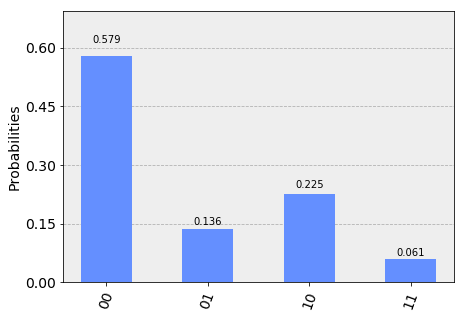

In [6]:
from qiskit.tools.visualization import plot_histogram
print(job_exp.result())
plot_histogram(job_exp.result().get_counts(qc))